<a href="https://colab.research.google.com/github/Kathi3/sturdy-waddle/blob/main/WrangleAct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
***WE RATE DOGS CHALLENGE***
```



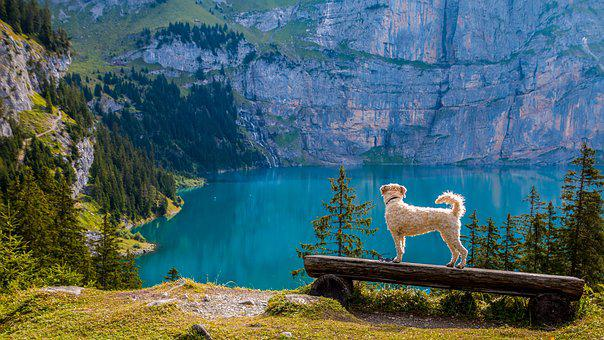

1. **Problem Statement** 

Real-world data rarely comes clean. Using Python and its libraries, you will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. 
The dataset that you will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.
 

**2. Objective** 

The goal:

1) To Load the Data and Access it using 3 methods.
API, CSV & TSV.

2) Combine the files to make 1 dataframe.

3) Tidy up the Data to geta  cleaner Dataframe.

4)Detect and correct 8 quality issues.

5) Visualize the data

**3. Defining the Metrics of Success** 

The work will be considered succesful if it achieves a clean version of the WeRateDogs Version that creates an interesting and trustworthy analyses and visualizations.

# Importing Libraries

In [1]:
def conf_matrix(y, y_pred, title, labels):
    fig, ax =plt.subplots(figsize=(7.5,7.5))
    ax=sns.heatmap(confusion_matrix(y, y_pred), annot=True, cmap="Purples", fmt='g', cbar=False, annot_kws={"size":30})
    plt.title(title, fontsize=25)
    ax.xaxis.set_ticklabels(labels, fontsize=16) 
    ax.yaxis.set_ticklabels(labels, fontsize=14.5)
    ax.set_ylabel('Test', fontsize=25)
    ax.set_xlabel('Predicted', fontsize=25)
    plt.show()

In [2]:
#Libraries for general purpose
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

#Text cleaning
import nltk
nltk.download('wordnet')
import re, string

from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re,string, nltk
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
import warnings
warnings.filterwarnings(action="ignore")
from wordcloud import WordCloud, STOPWORDS

#Data preprocessing
import tweepy
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

#set style for plots
sns.set_style("whitegrid")
sns.despine()
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlepad=10)

[nltk_data] Downloading package wordnet to /root/nltk_data...


<Figure size 432x288 with 0 Axes>

# Accessing & Loading the data

df_original = pd.read_csv('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv')
df_original.head()

df = pd.read_csv('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv')
df.head()

Accessing the TSV file and loading it as a csv - 1st Method of Data Access.

In [3]:
#importing tsv file as csv with tab delimeter
DogImages_df = pd.read_csv('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv', sep='\t')
DogImages_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


Accessing the data as a csv file a loading it as such. - 2nd Method.

In [4]:
!pip install opendatasets
import opendatasets as od
od.download("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


917504it [00:01, 502953.61it/s]                            


In [19]:
df0 = pd.read_csv('/content/twitter-archive-enhanced.csv')
df0.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


Accessing the data on WeRateDogs Via APIS (Twitter using Tweepy), laoding it and saving the tweets in a JSON file.

In [6]:
pip install tweepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import tweepy as tw
# your Twitter API key and API secret
my_api_key = "wF3J7Kxj6FdjQVdwEvQ5Is5AY"
my_api_secret = "fSWt2fz41xpU5QFxUStzispl5hTI5pOxDCOZSTCXSj81OcRCvA"
# authenticate
auth = tw.OAuthHandler(my_api_key, my_api_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [8]:
search_query = "WeRateDogs"

In [13]:
tweet = api.get_status('672997845381865473')
tweet._json

{'created_at': 'Sat Dec 05 04:36:04 +0000 2015',
 'id': 672997845381865473,
 'id_str': '672997845381865473',
 'text': "Say hello to Kenzie. She is a fluff ball. 12/10 you'd need to taser me for me to let go of her https://t.co/dph1UHNJrg",
 'truncated': False,
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 672997838817796096,
    'id_str': '672997838817796096',
    'indices': [95, 118],
    'media_url': 'http://pbs.twimg.com/media/CVb39_1XIAAMoIv.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/CVb39_1XIAAMoIv.jpg',
    'url': 'https://t.co/dph1UHNJrg',
    'display_url': 'pic.twitter.com/dph1UHNJrg',
    'expanded_url': 'https://twitter.com/dog_rates/status/672997845381865473/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'medium': {'w': 576, 'h': 1024, 'resize': 'fit'},
     'small': {'w': 383, 'h': 680, 'resize': 'fit'},
     'large': {'w': 576, 'h': 1024, 'resize': '

In [21]:
Ma_tweet = np.union1d(df0.tweet_id.unique(), DogImages_df.tweet_id.unique())


***BORROWED CODE - NOT MY ORIGINAL WORK***

In [22]:
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify =True)
failed_process_tweets = {}
with open('tweet_json.txt', 'w') as file:
     file.write('[')
     for tweet_id  in unique_tweet_ids:
         try:
             print(f"processing tweet_id: {tweet_id}")
             tweet = api.get_status(tweet_id,tweet_mode='extended')
             json.dump(tweet._json, file)
             file.write(',')
         except tweepy.TweepError as e:
             print(f"failed to process tweet_id:{tweet_id}")
             failed_process_tweets[tweet_id] = e
             pass            
     file.write('{}]')

processing tweet_id: 666020888022790149
processing tweet_id: 666029285002620928
processing tweet_id: 666033412701032449
processing tweet_id: 666044226329800704
processing tweet_id: 666049248165822465
processing tweet_id: 666050758794694657
processing tweet_id: 666051853826850816
processing tweet_id: 666055525042405380
processing tweet_id: 666057090499244032
processing tweet_id: 666058600524156928
processing tweet_id: 666063827256086533
processing tweet_id: 666071193221509120
processing tweet_id: 666073100786774016
processing tweet_id: 666082916733198337
processing tweet_id: 666094000022159362
processing tweet_id: 666099513787052032
processing tweet_id: 666102155909144576
processing tweet_id: 666104133288665088
processing tweet_id: 666268910803644416
processing tweet_id: 666273097616637952
processing tweet_id: 666287406224695296
processing tweet_id: 666293911632134144
processing tweet_id: 666337882303524864
processing tweet_id: 666345417576210432
processing tweet_id: 666353288456101888


processing tweet_id: 695446424020918272
processing tweet_id: 695629776980148225
processing tweet_id: 695767669421768709
processing tweet_id: 695794761660297217
processing tweet_id: 695816827381944320
processing tweet_id: 696100768806522880
processing tweet_id: 696405997980676096
processing tweet_id: 696488710901260288
processing tweet_id: 696490539101908992
processing tweet_id: 696518437233913856
processing tweet_id: 696713835009417216
processing tweet_id: 696744641916489729
processing tweet_id: 696754882863349760
processing tweet_id: 696877980375769088
processing tweet_id: 696886256886657024
processing tweet_id: 696894894812565505
processing tweet_id: 696900204696625153
processing tweet_id: 697242256848379904
processing tweet_id: 697255105972801536
processing tweet_id: 697259378236399616
processing tweet_id: 697270446429966336
processing tweet_id: 697463031882764288
processing tweet_id: 697482927769255936
processing tweet_id: 697516214579523584
processing tweet_id: 697575480820686848


processing tweet_id: 803773340896923648
processing tweet_id: 804026241225523202
processing tweet_id: 804413760345620481
processing tweet_id: 804475857670639616
processing tweet_id: 804738756058218496
processing tweet_id: 805207613751304193
processing tweet_id: 805487436403003392
processing tweet_id: 805520635690676224
processing tweet_id: 805823200554876929
processing tweet_id: 805826884734976000
processing tweet_id: 805932879469572096
processing tweet_id: 805958939288408065
processing tweet_id: 806219024703037440
processing tweet_id: 806242860592926720
processing tweet_id: 806542213899489280
processing tweet_id: 806576416489959424
processing tweet_id: 806620845233815552
processing tweet_id: 806629075125202948
processing tweet_id: 807010152071229440
processing tweet_id: 807059379405148160
processing tweet_id: 807106840509214720
processing tweet_id: 807621403335917568
processing tweet_id: 808001312164028416
processing tweet_id: 808106460588765185
processing tweet_id: 808134635716833280


In [38]:
tweetC_df = pd.read_json("tweet_json.txt",dtype ={"id_str": str})[:-1]
tweetC_df.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2015-11-15 22:32:08+00:00,6.660209e+17,666020888022790149,Here we have a Japanese Irish Setter. Lost eye...,0.0,"[0, 131]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666020881337073664, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0.0,0.0,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2015-11-15 23:05:30+00:00,6.660293e+17,666029285002620928,This is a western brown Mitsubishi terrier. Up...,0.0,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0.0,0.0,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,2015-11-15 23:21:54+00:00,6.660334e+17,666033412701032449,Here is a very happy pup. Big fan of well-main...,0.0,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0.0,0.0,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
3,2015-11-16 00:04:52+00:00,6.660442e+17,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,0.0,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0.0,0.0,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
4,2015-11-16 00:24:50+00:00,6.660492e+17,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,0.0,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0.0,0.0,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


Combining all the datasets to 1 that we can now clean and analyze.

In [39]:
Extreme_df = df0.set_index('tweet_id').join(tweetC_df.set_index('id_str'),lsuffix='_basic', rsuffix='_extended')
Extreme_df = Extreme_df.join(DogImages_df.set_index('tweet_id'),lsuffix='', rsuffix='_breed')

# Data Cleaning

In [40]:
Extreme_df.shape

(2356, 58)

This data consist 2356 rows, and 58 columns.

In [41]:
Extreme_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2356 entries, 892420643555336193 to 666020888022790149
Data columns (total 58 columns):
 #   Column                          Non-Null Count  Dtype              
---  ------                          --------------  -----              
 0   in_reply_to_status_id_basic     78 non-null     float64            
 1   in_reply_to_user_id_basic       78 non-null     float64            
 2   timestamp                       2356 non-null   object             
 3   source_basic                    2356 non-null   object             
 4   text                            2356 non-null   object             
 5   retweeted_status_id             181 non-null    float64            
 6   retweeted_status_user_id        181 non-null    float64            
 7   retweeted_status_timestamp      181 non-null    object             
 8   expanded_urls                   2297 non-null   object             
 9   rating_numerator                2356 non-null   int64      

In [42]:
#checking for null values in the dataset
(Extreme_df.isna().sum())/(len(Extreme_df))

in_reply_to_status_id_basic       0.966893
in_reply_to_user_id_basic         0.966893
timestamp                         0.000000
source_basic                      0.000000
text                              0.000000
retweeted_status_id               0.923175
retweeted_status_user_id          0.923175
retweeted_status_timestamp        0.923175
expanded_urls                     0.025042
rating_numerator                  0.000000
rating_denominator                0.000000
name                              0.000000
doggo                             0.000000
floofer                           0.000000
pupper                            0.000000
puppo                             0.000000
created_at                        1.000000
id                                1.000000
full_text                         1.000000
truncated                         1.000000
display_text_range                1.000000
entities                          1.000000
extended_entities                 1.000000
source_exte

In [43]:
Extreme_df.dropna(
    axis=0,
    how='any',
    thresh=0.5,
    subset=None,
    inplace=True)

In [44]:
Extreme_df['rating_numerator'].value_counts(normalize = True)

12      0.236842
11      0.196944
10      0.195671
13      0.148981
9       0.067063
8       0.043294
7       0.023345
14      0.022920
5       0.015705
6       0.013582
3       0.008065
4       0.007216
2       0.003820
1       0.003820
75      0.000849
15      0.000849
420     0.000849
0       0.000849
80      0.000424
144     0.000424
17      0.000424
26      0.000424
20      0.000424
121     0.000424
143     0.000424
44      0.000424
60      0.000424
45      0.000424
50      0.000424
99      0.000424
204     0.000424
1776    0.000424
165     0.000424
666     0.000424
27      0.000424
182     0.000424
24      0.000424
960     0.000424
84      0.000424
88      0.000424
Name: rating_numerator, dtype: float64

This shows the spreadout of ratings. The analysis shows most  of the ratings are clearly off the scale we wish to use.

In [45]:
Extreme_df[['rating_numerator']].describe()

,rating_numerator
count,2356.000000
mean,13.126486
std,45.876648
min,0.000000
25%,10.000000
50%,11.000000
75%,12.000000
max,1776.000000


While doing the duplicated code shows 0 duplicates, an analysis of the dataset shows there are repeated columns hence there is a need to drop them.

In [46]:
Extreme_df.drop(columns=['created_at','source_extended','id','expanded_urls'], inplace=True)

In [47]:
# cleaning of the tweets
def clean_tweet(Extreme_df,field):
    Extreme_df[field] = Extreme_df[field].str.replace(r"http\S+"," ")
    Extreme_df[field] = Extreme_df[field].str.replace(r"http"," ")
    Extreme_df[field] = Extreme_df[field].str.replace(r"@","at")
    Extreme_df[field] = Extreme_df[field].str.replace("#[A-Za-z0-9_]+", ' ')
    Extreme_df[field] = Extreme_df[field].str.replace(r"[^A-Za-z(),!?@\'\"_\n]"," ")
    Extreme_df[field] = Extreme_df[field].str.lower()
    return Extreme_df

In [48]:
Extreme_df.shape

(2356, 54)

In [49]:
Extreme_df.head()

,in_reply_to_status_id_basic,in_reply_to_user_id_basic,timestamp,source_basic,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,,,,,,,,,,,
892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,13,10,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,13,10,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,12,10,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,13,10,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,12,10,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


This shows how the 'rating_numerator' is distributed.

# Data Integrity

## Distributions

In [50]:
Extreme_df.to_csv('/content/twitter-archive-enhanced.csv')

In [51]:
df = pd.read_csv('/content/twitter-archive-enhanced.csv')

Text(0, 0.5, 'Tweet Length')

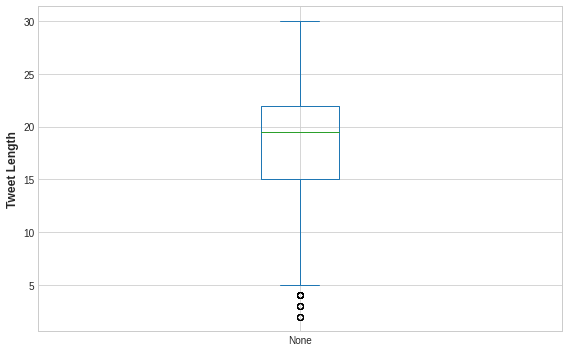

In [52]:
#Getting the tweet length
tweet_len = pd.Series([len(tweet.split())for tweet in Extreme_df["text"]])
plt.figure(figsize=(8,5))
tweet_len.plot(kind="box")
plt.ylabel("Tweet Length")

This graph gets to show the general distribution of our tweets and as we can see, we have some outliers but since this does not affect the analysi, we can work with them.

Text(0, 0.5, 'TimeStamp Variation')

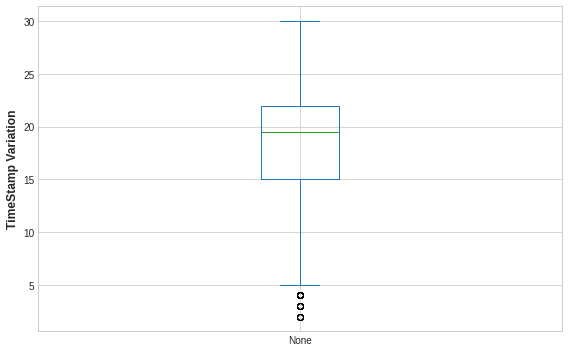

In [57]:
tweet_len1 = pd.Series([len(tweet.split())for tweet in Extreme_df["timestamp"]])
plt.figure(figsize=(8,5))
tweet_len.plot(kind="box")
plt.ylabel("TimeStamp Variation")

This graph gets to show the general distribution of the timestamps we have for our tweets awhile most are in the region, we have some outliers but since this does not affect the analysi, we can work with them.

In [53]:
Extreme_df.text.value_counts()

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU                                      1
Army of water dogs here. None of them know where they're going. Have no real purpose. Aggressive barks. 5/10 for all https://t.co/A88x73TwMN       1
This is Louis. He's a rollercoaster of emotions. Incalculably fluffy. 12/10 would pet firmly https://t.co/17RGvOZO9P                               1
With great pupper comes great responsibility. 12/10 https://t.co/hK6xB042EP                                                                        1
Meet Trooper &amp; Maya. Trooper protects Maya from bad things like dognappers and Comcast. So touching. 11/10 for both https://t.co/c98k1IoZKy    1
                                                                                                                                                  ..
This is Tucker. He would like a hug. 13/10 someone hug him https://t.co/wdgY9oHPrT                        

Text(0, 0.5, 'TimeStamp Variation')

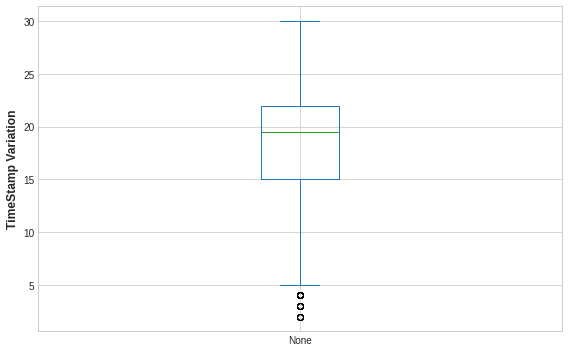

In [80]:
tweet_len1 = pd.Series([len(tweet.split())for tweet in Extreme_df["source_basic"]])
plt.figure(figsize=(8,5))
tweet_len.plot(kind="box")
plt.ylabel("TimeStamp Variation")

This graph gets to show the general distribution of the Source Basic we have for our tweets a while most are in the region, we have some outliers but since this does not affect the analysis, we can work with them.

## Data Visualization

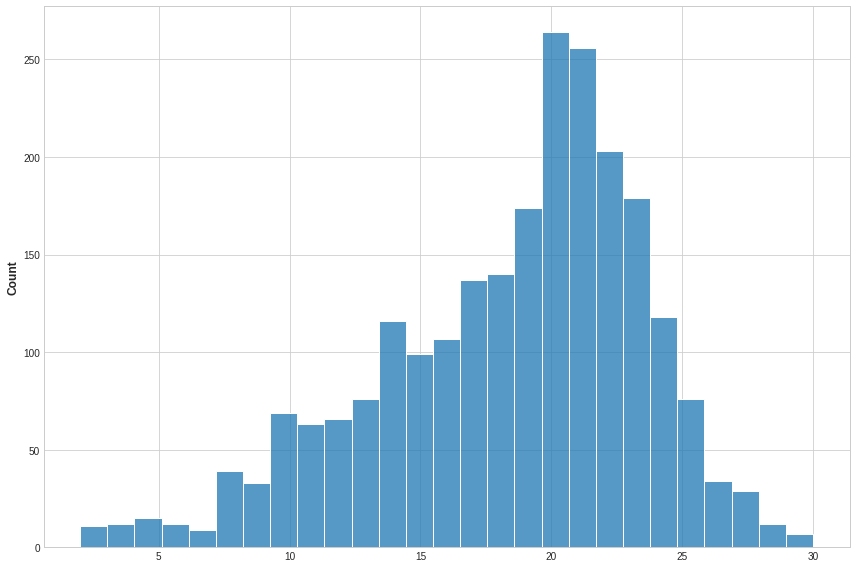

In [99]:
plt.figure(figsize=(12,8))
sns.histplot(tweet_len,palette="yellow")

The 'text' column in our dataset majorly adheres to a Normal Distribution Curve but as in the box plot, we can see our outliers.

In [102]:
#Analysis of categorical variables
Deep_dive = Extreme_df.select_dtypes(include='object').columns.to_list()
for col in Deep_dive:
  print(f'Column: {col}')
  print(Extreme_df[col].value_counts().sort_values(ascending=False))
  print('**********')
  print('\n')

Column: timestamp
2017-08-01 16:23:56 +0000    1
2017-07-13 15:19:09 +0000    1
2017-07-22 16:56:37 +0000    1
2017-07-27 16:25:51 +0000    1
2017-07-31 00:18:03 +0000    1
                            ..
2015-11-16 00:49:46 +0000    1
2015-11-16 00:35:11 +0000    1
2015-11-16 00:30:50 +0000    1
2015-11-16 00:24:50 +0000    1
2015-11-15 22:32:08 +0000    1
Name: timestamp, Length: 2356, dtype: int64
**********


Column: source_basic
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source_basic, dtype: int64
**********


Column: text
[12]      558
[11]      464
[10]      461
[13]      351
[9]       158
[8]       102
[7]        55
[14]       54
[5]        37
[6]       

In [62]:
from collections import Counter
from gensim.models import Word2Vec
import plotly.express as px

Checking for the most used words

In [97]:
Extreme_df['text'] = Extreme_df['rating_numerator'].apply(lambda x:str(x).split())
top = Counter([item for sublist in Extreme_df['text'] for item in sublist])
tweet_list1 = pd.DataFrame(top.most_common(20))
tweet_list1.columns = ['Words','Count']
tweet_list1.style.background_gradient(cmap='Blues')

,Words,Count
0,12,558
1,11,464
2,10,461
3,13,351
4,9,158
5,8,102
6,7,55
7,14,54
8,5,37
9,6,32


In [98]:
Extreme_df['rating_numerator'] = Extreme_df['rating_denominator'].apply(lambda x:str(x).split())
top = Counter([item for sublist in Extreme_df['rating_numerator'] for item in sublist])
tweet_list1 = pd.DataFrame(top.most_common(20))
tweet_list1.columns = ['Words','Count']
tweet_list1.style.background_gradient(cmap='Blues')

,Words,Count
0,10,2333
1,11,3
2,50,3
3,20,2
4,80,2
5,0,1
6,15,1
7,70,1
8,7,1
9,150,1


# Polarity and subjectivity

Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information

In [66]:
from textblob import TextBlob

In [69]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

Extreme_df['Subjectivity'] = Extreme_df['text'].apply(getSubjectivity)
Extreme_df['Polarity'] = Extreme_df['text'].apply(getPolarity)

Extreme_df.head()


,in_reply_to_status_id_basic,in_reply_to_user_id_basic,timestamp,source_basic,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,Subjectivity,Polarity
tweet_id,,,,,,,,,,,,,,,,,,,,,
892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,13,10,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,1.000000,0.000000
892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,13,10,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,0.433333,0.366667
891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,12,10,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,0.450000,0.150000
891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,13,10,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,0.150000,0.500000
891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,12,10,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,0.600000,0.233333


In [70]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    

Extreme_df['Analysis'] = Extreme_df['Polarity'].apply(getAnalysis)

Extreme_df.head()

,in_reply_to_status_id_basic,in_reply_to_user_id_basic,timestamp,source_basic,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,Subjectivity,Polarity,Analysis
tweet_id,,,,,,,,,,,,,,,,,,,,,
892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,13,10,...,False,bagel,0.085851,False,banana,0.076110,False,1.000000,0.000000,Neutral
892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,13,10,...,True,Pekinese,0.090647,True,papillon,0.068957,True,0.433333,0.366667,Positive
891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,12,10,...,True,malamute,0.078253,True,kelpie,0.031379,True,0.450000,0.150000,Positive
891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,13,10,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,0.150000,0.500000,Positive
891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,12,10,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,0.600000,0.233333,Positive


The result are something interesting to see. There seems to be a fairly even distribution in terms of Polarity (x-axis), but the Subjectivity(y-axis) displays what almost looks like a funnel. That is, many of the points are located in the upper part of the grid and gradually taper off towards zero - 1 meaning super opinionated, 0 meaning completely objective language. This also suggests that the more opinionated people are (one way or the other), the more subjective their language.


# Afinn

One method that can be used is the Afinn Score. 

Afinn is the simplest yet popular lexicons used for sentiment analysis developed by Finn Årup Nielsen. It contains 3300+ words with a polarity score associated with each word. In python, there is an in-built function for this lexicon. Low Afinn score indicated that it was a bad tweet, meanwhile more positive means good tweet.

In [74]:
!pip install afinn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 52 kB 1.1 MB/s 
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53447 sha256=2d6c92914b212e9e1915df8aab62700a8fb5c848cf8a9d3e1380497395f814df
  Stored in directory: /root/.cache/pip/wheels/9d/16/3a/9f0953027434eab5dadf3f33ab3298fa95afa8292fcf7aba75
Successfully built afinn


In [75]:
from afinn import Afinn
afinn = Afinn(language='en')

In [84]:
Extreme_df['Affin_sentiment'] = Extreme_df['text'].apply(lambda y : afinn.score(y))

In [90]:
# Checking AfinScore
def ApplyAfinScore(self):

        DataFrame = self.ReadingData()

        TweetList = DataFrame[Extreme_df.text].to_list()

        AfinScore = []

        for i in TweetList:
            AfinScore.append(afinn.score(i))

        DataFrame['Afin Sentence Score'] = AfinScore
        DataFrame = DataFrame.sort_values(by='Afin Sentence Score', ascending= True)

        return DataFrame

In [92]:
v = Extreme_df.sort_values(by=['Affin_sentiment']).head(10)['text'].to_list()

In [94]:
for t in v:
    print (t)
    print ()
    print ()
    print ('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
    print ()
    print ()

This is Oliver. You're witnessing one of his many brutal attacks. Seems to be playing with his victim. 13/10 fr*ckin frightening #BarkWeek https://t.co/WpHvrQedPb


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


This is Alexanderson. He's got a weird ass birth mark. Dreadful at fetch. Won't eat kibble. 3/10 wtf @Target https://t.co/FmxOpf2Sgl


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


This is Crystal. She's a shitty fireman. No sense of urgency. People could be dying Crystal. 2/10 just irresponsible https://t.co/rtMtjSl9pz


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Unique dog here. Wrinkly as hell. Weird segmented neck. Finger on fire. Doesn't seem to notice. 5/10 might still pet https://t.co/Hy9La4xNX3


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


This is Zoey. She really likes the planet. Would hate to see willful ignorance and the denial of fairly elemental science dest

**Conclusions** **&** **Recommendations**



```
# # This is formatted as code
```

The goal:

1) To Load the Data and Access it using 3 methods. -
- Used API Twitter Developer to access and load data through API.
- CSV Used the pandas libraries to load the dataset.
- TSV Used the pandas libraries to load the dataset

2) Combined the files to make 1 dataframe.

3) Tidied up the Data to geta cleaner Dataframe.

4) Detected and corrected atleast 8 quality issues.

5) Visualized the data to get a better and easier understanding for all.



```
# This is formatted as code
```

**Recommendations**

The process is long and tedious. It requires a significant amount of time to be able to run the codes.

**Conclusions**

The process could be way less repeatitive. 